<a href="https://colab.research.google.com/github/Pontibesties/Proyecto-Big-Data/blob/main/Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web Scraping

### Imports Necesarios

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importación de los datos

In [ ]:
urlWeb = "https://www.health.ny.gov/statistics/cancer/registry/appendix/neighborhoodpop.htm" # Url de la página web

In [ ]:
datos = pd.read_html(urlWeb) # Leer todo el html

In [ ]:
len(datos) # Imprimir en pantalla la cantidad de tablas leidas

1

### Métodos Útiles

In [ ]:
# Encontrar cantidad datos atípicos para una columna de un dataframe:
def count_outliers(df, col):
  iqr_range = 2.5
  
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  low = q1 - iqr * iqr_range
  high = q3 + iqr * iqr_range

  return df.loc[((df[col] < low) | (df[col] > high))].shape[0]

In [ ]:
poblacion = datos[0] # Obtener la tabla leida en una nueva variable de tipo DataFrame
poblacion            # Visualizar la tabla leida

,Borough,region,Males,Females,Total Population
0,Bronx,"Riverdale, Fieldston & Kingsbridge",52208,62077,114285
1,NaN,"Wakefield, Williamsbridge & Woodlawn",65362,78264,143625
2,NaN,"Co-op City, Pelham Bay & Schuylerville",55681,65997,121678
3,NaN,"Pelham Parkway, Morris Park & Laconia",61411,68186,129597
4,NaN,"Belmont, Crotona Park East & East Tremont",76502,88433,164934
5,NaN,"Bedford Park, Fordham North & Norwood",63030,68506,131536
6,NaN,"Morris Heights, Fordham South & Mount Hope",65208,72230,137439
7,NaN,"Concourse, Highbridge & Mount Eden",67927,75489,143416
8,NaN,"Castle Hill, Clason Point & Parkchester",88025,99956,187980
9,NaN,"Hunts Point, Longwood & Melrose",81032,79203,160235


### Exploración de los datos

In [ ]:
# Conocer las dimensiones del dataframe 
poblacion.shape 

(55, 5)

In [ ]:
# Identificar columnas, su tipo de dato y la cantidad de registros no nulos por cada atributo del dataframe
poblacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Borough           5 non-null      object
 1   region            55 non-null     object
 2   Males             55 non-null     int64 
 3   Females           55 non-null     int64 
 4   Total Population  55 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.3+ KB


In [ ]:
# Visualizar los primeros 5 registros del dataset de poblacion
poblacion.head(5)

,Borough,region,Males,Females,Total Population
0,Bronx,"Riverdale, Fieldston & Kingsbridge",52208,62077,114285
1,NaN,"Wakefield, Williamsbridge & Woodlawn",65362,78264,143625
2,NaN,"Co-op City, Pelham Bay & Schuylerville",55681,65997,121678
3,NaN,"Pelham Parkway, Morris Park & Laconia",61411,68186,129597
4,NaN,"Belmont, Crotona Park East & East Tremont",76502,88433,164934


In [ ]:
# Mostrar los valores únicos para cada una de las columnas del dataset
for col in poblacion:
  print(col+":\n", poblacion[col].value_counts())

Borough:
 Bronx                       1
Kings (Brooklyn)            1
New York (Manhattan)        1
Queens                      1
Richmond (Staten Island)    1
Name: Borough, dtype: int64
region:
 Riverdale, Fieldston & Kingsbridge                1
Bayside, Douglaston & Little Neck                 1
Central Harlem                                    1
East Harlem                                       1
Upper East Side                                   1
Upper West Side & West Side                       1
Chelsea, Clinton & Midtown Business District      1
Murray Hill, Gramercy & Stuyvesant Town           1
Chinatown & Lower East Side                       1
Battery Park City, Greenwich Village & Soho       1
Astoria & Long Island City                        1
Jackson Heights & North Corona                    1
Flushing, Murray Hill & Whitestone                1
Queens Village, Cambria Heights & Rosedale        1
Washington Heights, Inwood & Marble Hill          1
Briarwood, Fresh Meadow

In [ ]:
# Generar descriptivos estadísticos de las columnas numéricas del dataset
poblacion.describe(include='object')

,Borough,region
count,5,55
unique,5,55
top,Bronx,"Riverdale, Fieldston & Kingsbridge"
freq,1,1


In [ ]:
# Visualizar la matriz de correlación de los atributos numméricos del dataset
corr = poblacion.corr()
corr.style.background_gradient(cmap="coolwarm") # Se selecciona un gradiente para identificar más fácilmente la correlación entre columnas

,Males,Females,Total Population
Males,1.000000,0.933891,0.981769
Females,0.933891,1.000000,0.984829
Total Population,0.981769,0.984829,1.000000


In [ ]:
# Se muestra cuánta memoria utiliza cada columna en bytes
poblacion.memory_usage()

Index               128
Borough             440
region              440
Males               440
Females             440
Total Population    440
dtype: int64

### Encontrar los valores nulos en el dataset

In [ ]:
poblacion.isnull().sum() # Obtener la cantidad de valores nulos por columnas del dataset

Borough             50
region               0
Males                0
Females              0
Total Population     0
dtype: int64

### Transformar los valores nulos

In [ ]:
poblacion = poblacion.fillna(method='ffill') # Transformar los valores nulos con el método ffill que llena los valores por columnas tomando el dato anterior
poblacion                                    # Visualizar el dataframe

,Borough,region,Males,Females,Total Population
0,Bronx,"Riverdale, Fieldston & Kingsbridge",52208,62077,114285
1,Bronx,"Wakefield, Williamsbridge & Woodlawn",65362,78264,143625
2,Bronx,"Co-op City, Pelham Bay & Schuylerville",55681,65997,121678
3,Bronx,"Pelham Parkway, Morris Park & Laconia",61411,68186,129597
4,Bronx,"Belmont, Crotona Park East & East Tremont",76502,88433,164934
5,Bronx,"Bedford Park, Fordham North & Norwood",63030,68506,131536
6,Bronx,"Morris Heights, Fordham South & Mount Hope",65208,72230,137439
7,Bronx,"Concourse, Highbridge & Mount Eden",67927,75489,143416
8,Bronx,"Castle Hill, Clason Point & Parkchester",88025,99956,187980
9,Bronx,"Hunts Point, Longwood & Melrose",81032,79203,160235


### Validación de la transformación

In [ ]:
poblacion.isnull().sum() # Obtener la cantidad de valores nulos por columnas del dataset

Borough             0
region              0
Males               0
Females             0
Total Population    0
dtype: int64

### Visualización

In [ ]:
males = (poblacion.groupby(('Borough')).Males.sum()).to_frame() # Filtrar el dataset para obtener la cantidad de hombres por distrito
males                                                           # Visualizar la transformación

,Males
Borough,
Bronx,676386
Kings (Brooklyn),1227550
New York (Manhattan),773545
Queens,1109771
Richmond (Staten Island),230243


In [ ]:
females = (poblacion.groupby('Borough').Females.sum()).to_frame() # Filtrar el dataset para obtener la cantidad de mujeres por distrito
females                                                           # Visualizar la transformación

,Females
Borough,
Bronx,758341
Kings (Brooklyn),1363193
New York (Manhattan),860674
Queens,1177421
Richmond (Staten Island),244749


In [ ]:
result = pd.merge(males, females, on='Borough') # Unificar la cantidad de hombres y mujeres por distrito en un dataframe
result                                          # Visualizar el nuevo DataFrame

,Males,Females
Borough,,
Bronx,676386,758341
Kings (Brooklyn),1227550,1363193
New York (Manhattan),773545,860674
Queens,1109771,1177421
Richmond (Staten Island),230243,244749


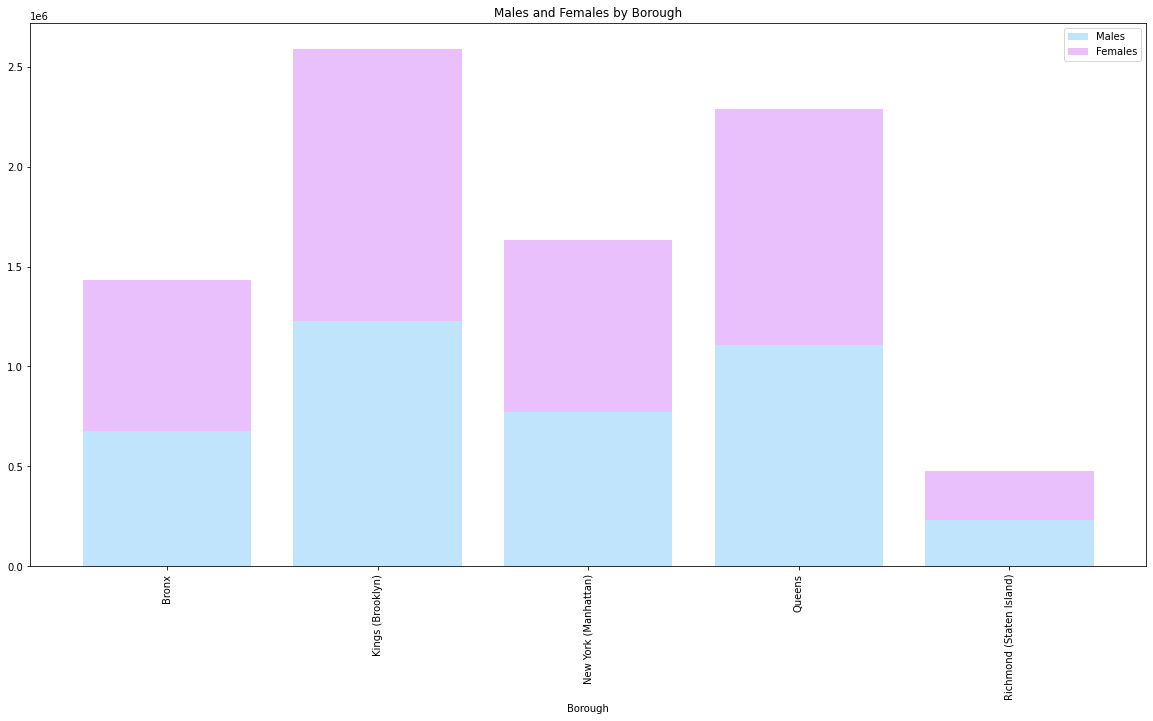

In [ ]:
colors = ['#63bcf7','#c863f7']          # Array de colores con los que se mostrará en el gráfico
result.plot(kind = 'bar', 
             stacked = 'True',          # Muestra las barras apiladas
             alpha = 0.4,               # nivel de transparencia
             width = 0.8,               # Grosor de las barras para dejar espacio entre ellas
             figsize=(20,10),           # Tamaño del gráfico
             color = colors,            # Asignación de los colores
             title = "Males and Females by Borough");